# Exercise with Natural Language Processing

For todays exersice we will be doing two things.  The first is to build the same model with the same data that we did in the lecture, the second will be to build a new model with new data. 

## PART 1: 
- 20 Newsgroups Corpus


## PART 2:
- Republican vs Democrat Tweet Classifier

In [82]:
# Import pandas for data handling
import pandas as pd

# NLTK is our Natural-Language-Took-Kit
import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

# Libraries for helping us with strings
import string
# Regular Expression Library
import re

# Import our text vectorizers
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer


# Import our classifiers
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier


# Import some ML helper function
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report


# Import our metrics to evaluate our model
from sklearn import metrics
from sklearn.metrics import classification_report


# Library for plotting
import matplotlib.pyplot as plt
import seaborn as sns

# You may need to download these from nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
stopwords = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/atsukosakurai/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/atsukosakurai/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/atsukosakurai/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## Load and display data.
1. Load the 20-newsgroups.csv data into a dataframe.
1. Print the shape
1. Inspect / remove nulls and duplicates
1. Find class balances, print out how many of each topic_category there are.

In [83]:
# 1. Load the 20-newsgroups.csv data into a dataframe.

df = pd.read_csv('data/20-newsgroups.csv')

# 2. Print the shape

print(df.shape)

(11314, 4)


In [84]:
df.head()

,id,message,topic,topic_category
0,0,From: lerxst@wam.umd.edu (where's my thing)\r\...,7,rec.autos
1,1,From: guykuo@carson.u.washington.edu (Guy Kuo)...,4,comp.sys.mac.hardware
2,2,From: twillis@ec.ecn.purdue.edu (Thomas E Will...,4,comp.sys.mac.hardware
3,3,From: jgreen@amber (Joe Green)\r\nSubject: Re:...,1,comp.graphics
4,4,From: jcm@head-cfa.harvard.edu (Jonathan McDow...,14,sci.space


In [85]:
# 3. Inspect / remove nulls and duplicates

print(df.isnull().sum())
print(df.duplicated().sum())

id                0
message           0
topic             0
topic_category    0
dtype: int64
0


In [86]:
# 4. Find class balances, print out how many of each topic_category there are.

df.topic_category.value_counts()

rec.sport.hockey            600
soc.religion.christian      599
rec.motorcycles             598
rec.sport.baseball          597
sci.crypt                   595
sci.med                     594
rec.autos                   594
comp.windows.x              593
sci.space                   593
comp.os.ms-windows.misc     591
sci.electronics             591
comp.sys.ibm.pc.hardware    590
misc.forsale                585
comp.graphics               584
comp.sys.mac.hardware       578
talk.politics.mideast       564
talk.politics.guns          546
alt.atheism                 480
talk.politics.misc          465
talk.religion.misc          377
Name: topic_category, dtype: int64

# Text Pre-Processing 
(aka Feature engineering)
1. Make a function that makes all text lowercase.
    * Do a sanity check by feeding in a test sentence into the function. 
    
    
2. Make a function that removes all punctuation. 
    * Do a sanity check by feeding in a test sentence into the function. 
    
    
3. Make a function that removes all stopwords.
    * Do a sanity check by feeding in a test sentence into the function. 
    
    
4. EXTRA CREDIT (This step only): Make a function that stemms all words. 


5. Mandatory: Make a pipeline function that applys all the text processing functions you just built.
    * Do a sanity check by feeding in a test sentence into the pipeline. 
    
    
    
6. Mandatory: Use `df['message_clean'] = df[column].apply(???)` and apply the text pipeline to your text data column. 

In [87]:
# 1. Make a function that makes all text lowercase.

def make_lower(s):
    return s.lower()

test_string = 'This is A SENTENCE with LOTS OF CAPS.'

make_lower(test_string)

'this is a sentence with lots of caps.'

In [88]:
# 2. Make a function that removes all punctuation. 

def remove_punc(s):
    s = re.sub(r'[^\w\s]','',s)
    return s

test_string = 'This is a sentence! 50 With lots of punctuation??? & other #things.'

remove_punc(test_string)

'This is a sentence 50 With lots of punctuation  other things'

In [89]:
# 3. Make a function that removes all stopwords.

def remove_stopwords(s):
    
    # splits string into words, better than a_string.split(' ')
    words = word_tokenize(s)
    
    valid_words = []
    
    for word in words:
        
        if word not in stopwords:
            
            valid_words.append(word)
            
    s = ' '.join(valid_words)
    
    return s

test_string = 'This is a sentence! With some different stopwords i have added in here.'
remove_stopwords(test_string)

'This sentence ! With different stopwords added .'

In [90]:
# 4. EXTRA CREDIT: Make a function that stemms all words. 

def stem_words(s):
    
    porter = PorterStemmer()
    
    # splits string into words, better than a_string.split(' ')
    words = word_tokenize(s)
    
    valid_words = []
    
    for word in words:
        
        stemmed_word = porter.stem(word)
        
        valid_words.append(stemmed_word)
        
    s = ' '.join(valid_words)
    
    return s

test_string = 'I played and started playing with players and we all love to play with plays'

stem_words(test_string)

'I play and start play with player and we all love to play with play'

# Question

In [91]:
# 5. MANDATORY: Make a pipeline function that applys all the text processing functions you just built.

def text_pipeline(input_string):
    input_string = make_lower(input_string)
    # i played and started playing with players and we all love to play with plays
    input_string = remove_punc(input_string)
    # no change
    input_string = remove_stopwords(input_string)
    # why does it remove 'i'?
    #input_string = stem_words(input_string)

    return input_string

test_string = 'I played and started playing with players and we all love to play with plays'

text_pipeline(test_string)

'played started playing players love play plays'

In [92]:
# 6. Mandatory: Use `df[column].apply(???)` and apply the text pipeline to your text data column. 

df['message_clean'] = df['message'].apply(text_pipeline)

print('Original:', df['message'][0])
print('Cleaned:', df['message_clean'][0])


Original: From: lerxst@wam.umd.edu (where's my thing)
Subject: WHAT car is this!?
Nntp-Posting-Host: rac3.wam.umd.edu
Organization: University of Maryland, College Park
Lines: 15

 I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail.

Thanks,
- IL
   ---- brought to you by your neighborhood Lerxst ----





Cleaned: lerxstwamumdedu wheres thing subject car nntppostinghost rac3wamumdedu organization university maryland college park lines 15 wondering anyone could enlighten car saw day 2door sports car looked late 60s early 70s called bricklin doors really small addition f

In [93]:
df.head()

,id,message,topic,topic_category,message_clean
0,0,From: lerxst@wam.umd.edu (where's my thing)\r\...,7,rec.autos,lerxstwamumdedu wheres thing subject car nntpp...
1,1,From: guykuo@carson.u.washington.edu (Guy Kuo)...,4,comp.sys.mac.hardware,guykuocarsonuwashingtonedu guy kuo subject si ...
2,2,From: twillis@ec.ecn.purdue.edu (Thomas E Will...,4,comp.sys.mac.hardware,twillisececnpurdueedu thomas e willis subject ...
3,3,From: jgreen@amber (Joe Green)\r\nSubject: Re:...,1,comp.graphics,jgreenamber joe green subject weitek p9000 org...
4,4,From: jcm@head-cfa.harvard.edu (Jonathan McDow...,14,sci.space,jcmheadcfaharvardedu jonathan mcdowell subject...


# Text Vectorization

1. Define your `X` and `y` data. 


2. Initialize a vectorizer (you can use TFIDF or BOW, it is your choice).
    * Do you want to use n-grams..?


3. Fit your vectorizer using your X data.
    * Remember, this process happens IN PLACE.


4. Transform your X data using your fitted vectorizer. 
    * `X = vectorizer.???`



5. Print the shape of your X.  How many features (aka columns) do you have?

In [94]:
# 1. Define your `X` and `y` data. 

X = df['message_clean'].values

y = df['topic_category'].values

In [95]:
# 2. Initialize a vectorizer (you can use TFIDF or BOW, it is your choice).

vectorizer_bow = CountVectorizer()

In [96]:
# 3. Fit your vectorizer using your X data

vectorizer_bow.fit(X)

CountVectorizer()

In [97]:
# 4. Transform your X data using your fitted vectorizer. 

X = vectorizer_bow.transform(X)

In [98]:
# 5. Print the shape of your X.  How many features (aka columns) do you have?

print(X.shape, type(X))

(11314, 139767) <class 'scipy.sparse.csr.csr_matrix'>


# Split your data into Training and Testing data. 

In [99]:
# Split our data into testing and training like always. 

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=45)

___
# Build and Train Model
Use Multinomial Naive Bayes to classify these documents. 

1. Initalize an empty model. 
2. Fit the model with our training data.


Experiment with different alphas.  Use the alpha gives you the best result.

EXTRA CREDIT:  Use grid search to programmatically do this for you. 

In [100]:
# 1. Initalize an empty model. 

model = MultinomialNB(alpha=0.5)


In [101]:
# Fit our model with our training data.

model.fit(X_train, y_train)


MultinomialNB(alpha=0.5)

# Evaluate the model.

1. Make new predicitions using our test data. 
2. Print the accuracy of the model. 
3. Print the confusion matrix of our predictions. 
4. Using `classification_report` print the evaluation results for all the classes. 



In [102]:
# 1. Make new predictions of our testing data. 

y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)

In [103]:
# 2. Print the accuracy of the model. 
accuracy = model.score(X_test, y_test)

print("Model Accuracy: %f" % accuracy)

Model Accuracy: 0.884666


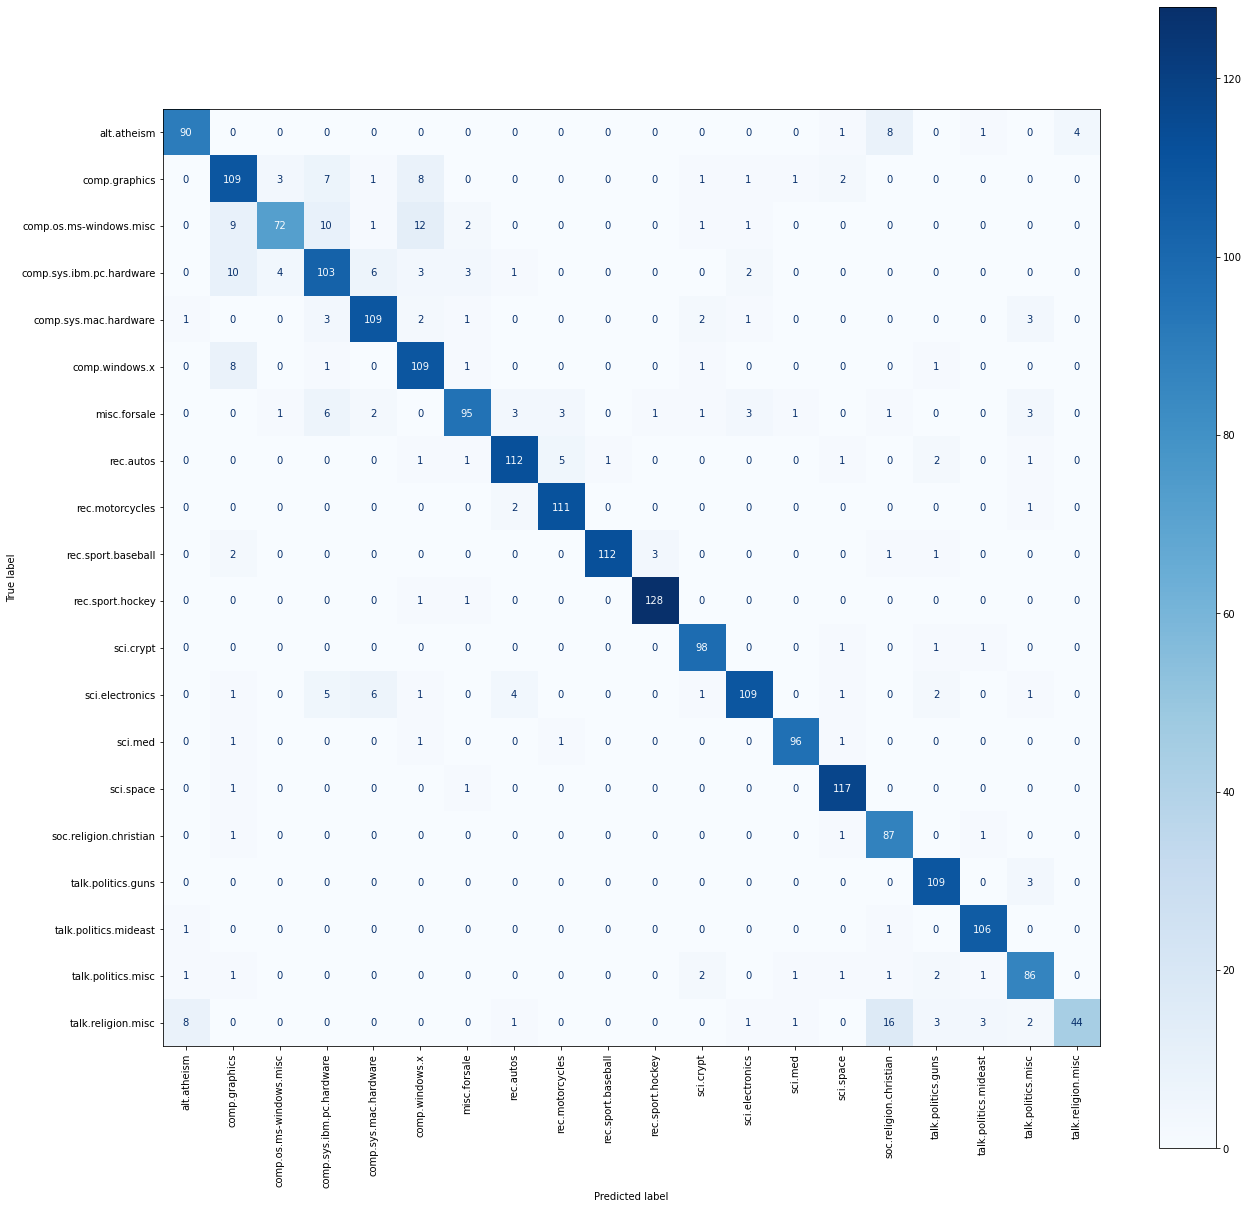

In [104]:
# 3. Plot the confusion matrix of our predictions

fig, ax = plt.subplots(figsize=(21, 21))

disp = plot_confusion_matrix(model, X_test, y_test,
                            display_labels=model.classes_,
                            cmap=plt.cm.Blues, ax=ax)

plt.xticks(rotation=90)
disp

In [105]:
# 4. Using `classification_report` print the evaluation results for all the classes. 

print(classification_report(y_test, y_pred,
                           target_names=model.classes_))

                          precision    recall  f1-score   support

             alt.atheism       0.89      0.87      0.88       104
           comp.graphics       0.76      0.82      0.79       133
 comp.os.ms-windows.misc       0.90      0.67      0.77       108
comp.sys.ibm.pc.hardware       0.76      0.78      0.77       132
   comp.sys.mac.hardware       0.87      0.89      0.88       122
          comp.windows.x       0.79      0.90      0.84       121
            misc.forsale       0.90      0.79      0.84       120
               rec.autos       0.91      0.90      0.91       124
         rec.motorcycles       0.93      0.97      0.95       114
      rec.sport.baseball       0.99      0.94      0.97       119
        rec.sport.hockey       0.97      0.98      0.98       130
               sci.crypt       0.92      0.97      0.94       101
         sci.electronics       0.92      0.83      0.88       131
                 sci.med       0.96      0.96      0.96       100
         

# Manual predicition
Write a new sentence that you think will be classified as talk.politics.guns. 
1. Apply the text pipeline to your sentence
2. Transform your cleaned text using the `X = vectorizer.transform([your_text])`
    * Note, the `transform` function accepts a list and not a individual string.
3. Use the model to predict your new `X`. 
4. Print the prediction

In [106]:
my_sentence = 'I bought an AR-15 and some ammunition at a gunshow in Texas!.'

# 1. Apply the text pipeline to your sentence

my_sentence_clean = text_pipeline(my_sentence)
print('Original:', my_sentence, '\n')
print('Clenaed: ', my_sentence_clean, '\n')

# 2. Transform your cleaned text using the `X = vectorizer.transform([your_text])`\

words = word_tokenize(my_sentence_clean)
X_new = vectorizer_bow.transform(words)

# 3. Use the model to predict your new `X`. 

y_pred_new = model.predict(X_new)


# 4. Print the prediction
print('Predicted Topic Categories:', y_pred_new)

Original: I bought an AR-15 and some ammunition at a gunshow in Texas!. 

Clenaed:  bought ar15 ammunition gunshow texas 

Predicted Topic Categories: ['rec.autos' 'talk.politics.guns' 'talk.politics.guns'
 'soc.religion.christian' 'talk.politics.guns']


___
# PART 2: Twitter Data
This part of the exercise is un-guided on purpose.  

Using the `dem-vs-rep-tweets.csv` build a classifier to determine if a tweet was written by a democrat or republican. 

Can you get an f1-score higher than %82

In [107]:
# 1. Load the 20-newsgroups.csv data into a dataframe.
# 2. Print the shape
df = pd.read_csv('data/dem-vs-rep-tweets.csv')

df.head()

,Party,Handle,Tweet
0,Democrat,RepDarrenSoto,"Today, Senate Dems vote to #SaveTheInternet. P..."
1,Democrat,RepDarrenSoto,RT @WinterHavenSun: Winter Haven resident / Al...
2,Democrat,RepDarrenSoto,RT @NBCLatino: .@RepDarrenSoto noted that Hurr...
3,Democrat,RepDarrenSoto,RT @NALCABPolicy: Meeting with @RepDarrenSoto ...
4,Democrat,RepDarrenSoto,RT @Vegalteno: Hurricane season starts on June...


In [108]:
print(df.shape)

(86460, 3)


In [109]:
# check for nulls and duplicates:
print(df.isnull().sum())
print(df.duplicated().sum())

Party     0
Handle    0
Tweet     0
dtype: int64
57


In [110]:
# since there are 57 duplicates, remove them from df:
df = df.drop_duplicates()
df.shape

(86403, 3)

In [111]:
#sanity check 
86403 + 57

86460

In [112]:
df.head()

,Party,Handle,Tweet
0,Democrat,RepDarrenSoto,"Today, Senate Dems vote to #SaveTheInternet. P..."
1,Democrat,RepDarrenSoto,RT @WinterHavenSun: Winter Haven resident / Al...
2,Democrat,RepDarrenSoto,RT @NBCLatino: .@RepDarrenSoto noted that Hurr...
3,Democrat,RepDarrenSoto,RT @NALCABPolicy: Meeting with @RepDarrenSoto ...
4,Democrat,RepDarrenSoto,RT @Vegalteno: Hurricane season starts on June...


In [113]:
# Check out a smaple of one of the 'Tweet' entries looks like:
df['Tweet'][0]

'Today, Senate Dems vote to #SaveTheInternet. Proud to support similar #NetNeutrality legislation here in the House… https://t.co/n3tggDLU1L'

In [114]:
# check value counts for dependent variable (class balances?):
df.Party.value_counts()

Republican    44362
Democrat      42041
Name: Party, dtype: int64

In [144]:
# apply lower case, remove punc, remove sw functions to the Tweet column:
df['tweets_clean'] = df['Tweet'].apply(text_pipeline)

# check 
print('Original:', df['Tweet'][0])
print('Cleaned:', df['tweets_clean'][0])

Original: Today, Senate Dems vote to #SaveTheInternet. Proud to support similar #NetNeutrality legislation here in the House… https://t.co/n3tggDLU1L
Cleaned: today senate dems vote savetheinternet proud support similar netneutrality legislation house httpstcon3tggdlu1l


In [145]:
df.head()

,Party,Handle,Tweet,tweets_clean
0,Democrat,RepDarrenSoto,"Today, Senate Dems vote to #SaveTheInternet. P...",today senate dems vote savetheinternet proud s...
1,Democrat,RepDarrenSoto,RT @WinterHavenSun: Winter Haven resident / Al...,rt winterhavensun winter resident alta vista t...
2,Democrat,RepDarrenSoto,RT @NBCLatino: .@RepDarrenSoto noted that Hurr...,rt nbclatino repdarrensoto noted hurricane mar...
3,Democrat,RepDarrenSoto,RT @NALCABPolicy: Meeting with @RepDarrenSoto ...,rt nalcabpolicy meeting repdarrensoto thanks t...
4,Democrat,RepDarrenSoto,RT @Vegalteno: Hurricane season starts on June...,rt vegalteno hurricane season starts june 1st ...


In [147]:
# Independent variable = cleaned tweets columns:

X = df['tweets_clean'].values

# Dependent variable = Party column:

y = df['Party'].values

In [148]:
# Initialize vectorizer using Tfidf
vectorizer  = TfidfVectorizer()

# Make vocabulary matrix
vectorizer.fit(X)

# transform documents into vectors
X = vectorizer.transform(X)

print(X.shape, type(X))

(86403, 132962) <class 'scipy.sparse.csr.csr_matrix'>


In [150]:
# train test split:

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [151]:
# Build and train model:

# initialize
model = MultinomialNB(alpha=0.5)

# fit model with training data:
model.fit(X_train, y_train)

# make prediction 
y_pred = model.predict(X_test)

# make predicted probabilities of testing data:
y_pred_prob = model.predict_proba(X_test)

# accuracy:
accuracy = model.score(X_test, y_test)

print("Accuracy: ", accuracy)

Accuracy:  0.8100225681384179


In [153]:
# classification report:

print(classification_report(
        y_test,
        y_pred,
        target_names=model.classes_))

              precision    recall  f1-score   support

    Democrat       0.83      0.77      0.80      8407
  Republican       0.80      0.85      0.82      8874

    accuracy                           0.81     17281
   macro avg       0.81      0.81      0.81     17281
weighted avg       0.81      0.81      0.81     17281



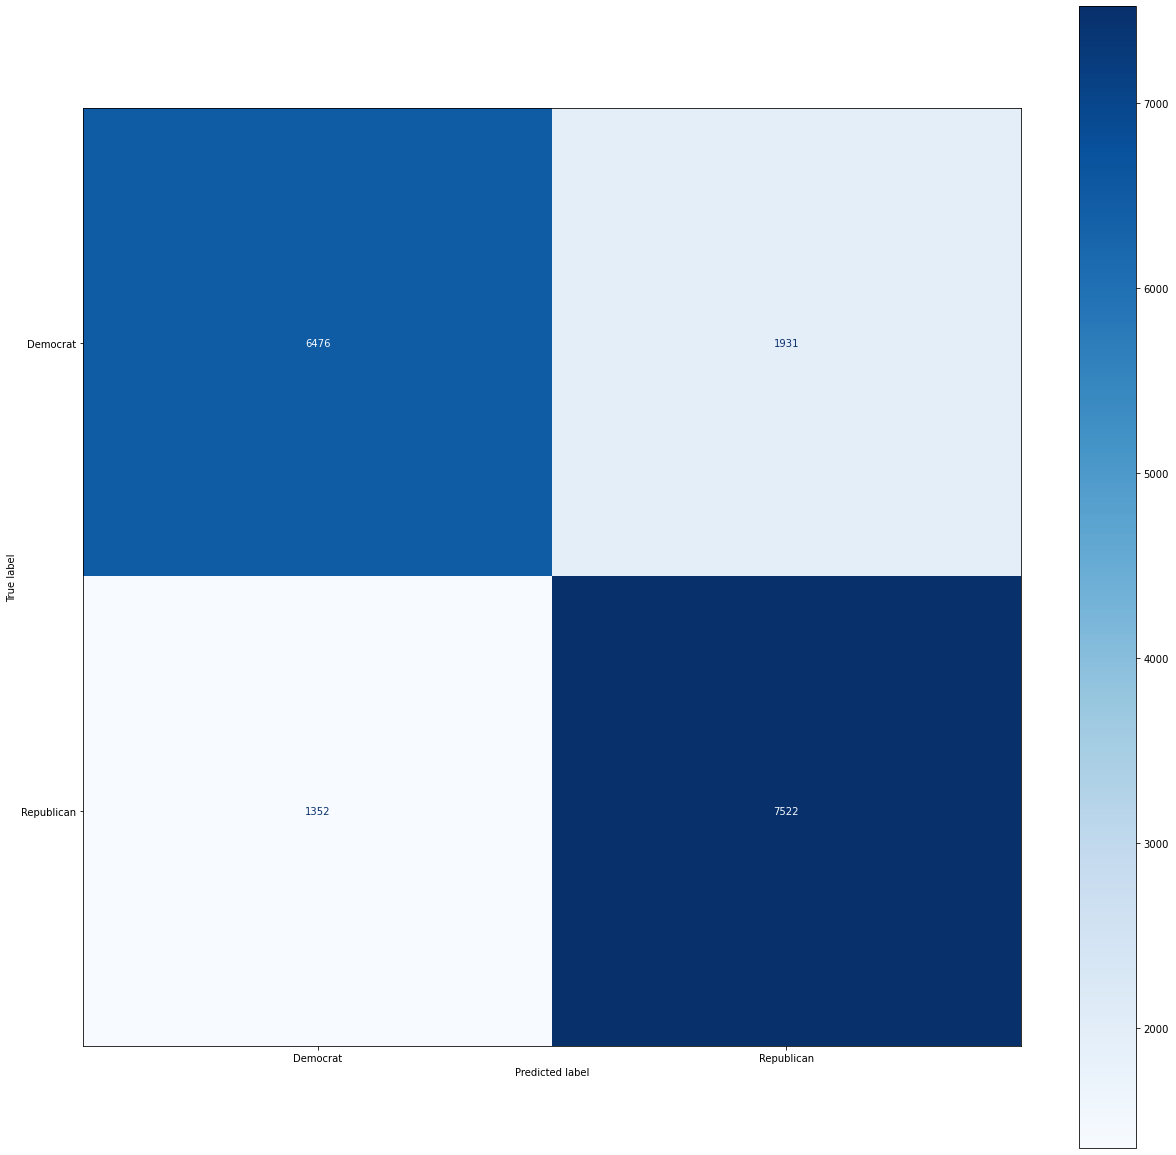

In [154]:
# confusion matrix:
fig, ax = plt.subplots(figsize=(21,21))

disp = plot_confusion_matrix(model, X_test, y_test,
                            display_labels=model.classes_,
                            cmap=plt.cm.Blues, ax=ax)

In [165]:
# manual prediction:

sample_txt = 'I love paying taxes.'
# 1. Apply the text pipeline to your sentence

sample_txt_clean = text_pipeline(sample_txt)
print('Original:', sample_txt, '\n')
print('Cleaned: ', sample_txt_clean, '\n')

# 2. Transform your cleaned text using the `X = vectorizer.transform([your_text])`\

words = word_tokenize(sample_txt_clean)
X_new = vectorizer.transform(words)

# 3. Use the model to predict your new `X`. 

y_pred_new = model.predict(X_new)

# 4. Print the prediction
print('Predicted Topic Categories:', y_pred_new)

Original: I love paying taxes. 

Clenaed:  love paying taxes 

Predicted Topic Categories: ['Democrat' 'Republican' 'Republican']


In [169]:
# see if random forrest gives a better f1 score:
rf_model = RandomForestClassifier()

# fit model with training data
rf_model.fit(X_train, y_train)

# make new prediction of testing data
y_pred_rf = rf_model.predict(X_test)

# predicted proba
y_pred_proba_rf = rf_model.predict_proba(X_test)

# evaluate model
accuracy = rf_model.score(X_test, y_test)

print(classification_report
           (y_test, y_pred, target_names=rf_model.classes_))


              precision    recall  f1-score   support

    Democrat       0.83      0.77      0.80      8407
  Republican       0.80      0.85      0.82      8874

    accuracy                           0.81     17281
   macro avg       0.81      0.81      0.81     17281
weighted avg       0.81      0.81      0.81     17281



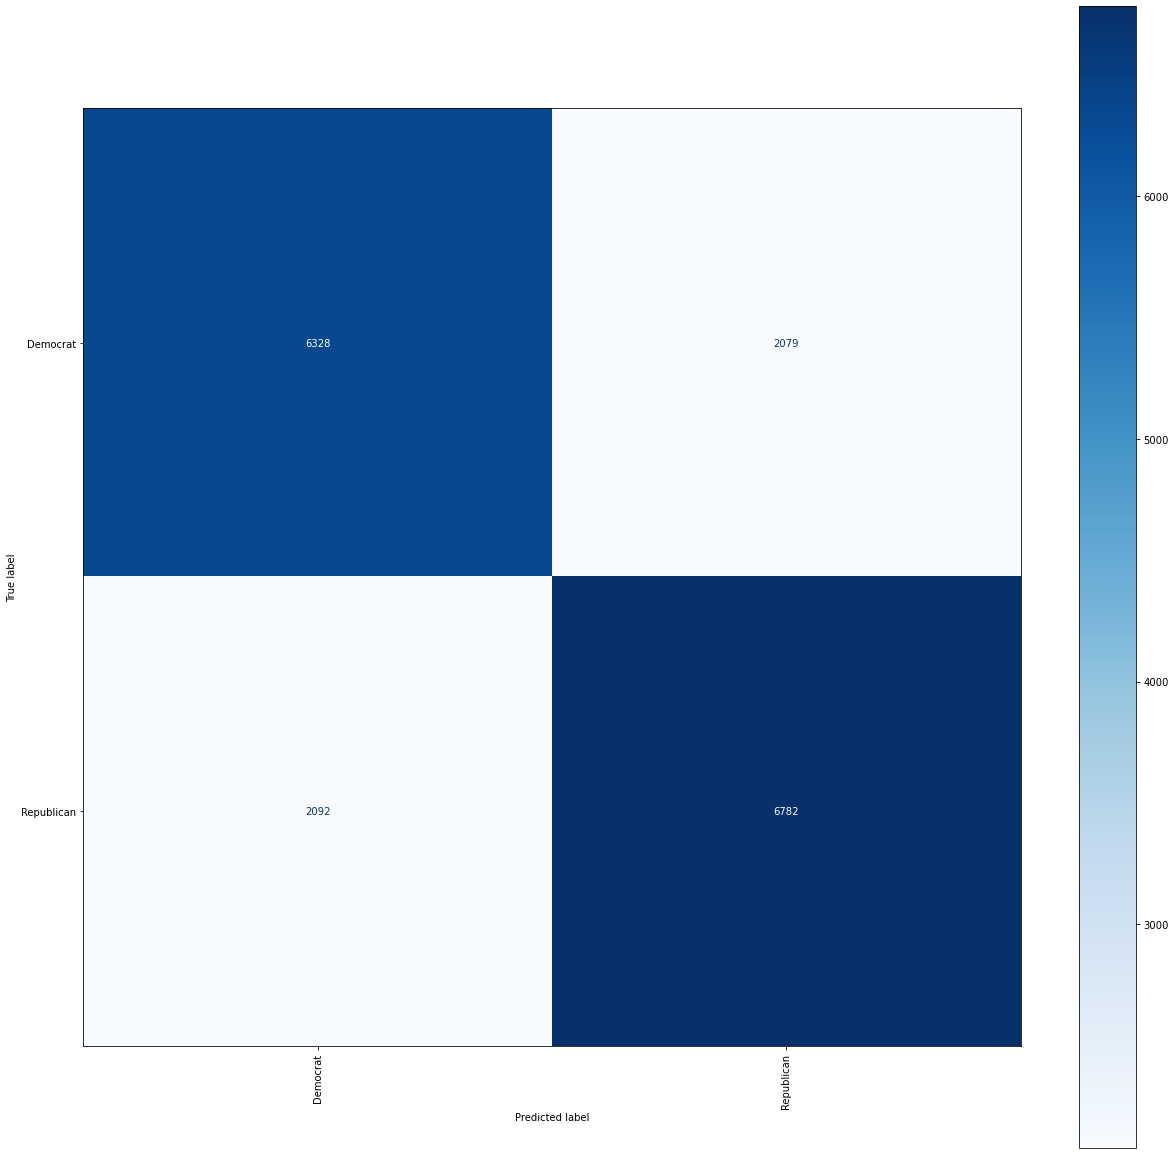

In [170]:
# Plot the confusion matrix of our results
fig, ax = plt.subplots(figsize=(21, 21))
disp = plot_confusion_matrix(rf_model, X_test, y_test,
                             display_labels=rf_model.classes_,
                             cmap=plt.cm.Blues, ax=ax)
plt.xticks(rotation=90)
disp